<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week2%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C1_%E5%B0%8F%E9%BA%A6%E3%81%A8%E3%83%81%E3%82%A7%E3%82%B9%E7%9B%A4%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week2授業前課題1 小麦とチェス盤問題
### **1.課題の目的**


*   Numpyを使ってみる
*   グラフの操作に慣れる




### **2. 作業内容**

「小麦とチェス盤」という話を元に、8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題をNumpyを使って解く。<br>以下、小麦とチェス盤の原文及び日本語訳
> If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?<br>
>>チェス盤の各マスに小麦を置いて、1マス目に1粒、2マス目に2粒、3マス目に4粒とした場合（後続のマスには2倍の数の小麦を置く）、終了時には何粒の小麦がチェス盤に置かれているでしょうか？

Wheat and chessboard problem (Oct. 3, 2020, 11:29 UTC). In Wikipedia: The Free Encyclopedia. Retrieved from https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem

<a title="McGeddon / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)" href="https://commons.wikimedia.org/wiki/File:Wheat_and_chessboard_problem.jpg"><img width="512" alt="Wheat and chessboard problem" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Wheat_and_chessboard_problem.jpg/512px-Wheat_and_chessboard_problem.jpg"></a></br>
McGeddon / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)


### 問題1　2×2マスのチェス盤の小麦の数
___
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算する。<br>左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。<br>**一般化させたいので任意のマスに対応した関数を作成。**

In [1]:
import numpy as np

# n×nマスの関数を作成
def board_list(n):
  n_squares = n**2  # マス目の数
  board_list = [1]    # マスに小麦が一個乗った状態からスタート
  for _ in range(n_squares - 1):    # 4マスの場合は3回繰り返す
    board_list.append(board_list[-1]*2)   # 前のマスに乗ってる小麦の数の2倍をリストに追加
  array_board_list = np.array(board_list).reshape(n, n)   # 形状を整理し、ndarrayにする。
  return array_board_list   # ndarrayを返す

print(board_list(2))

[[1 2]
 [4 8]]


### 問題2 n×mマスへの拡張
___
さっきの問題はnしか受け取ってないためマスの縦横が均等でない場合の関数に変える。

In [2]:
# n×mマスの関数を作成
def board_list(n, m):
  n_squares = n*m  # マス目の数
  board_list = [1]    
  for _ in range(n_squares - 1):   
    board_list.append(board_list[-1]*2)
  array_board_list = np.array(board_list).reshape(n, m)   # 行数n,列数m
  return array_board_list 

print(board_list(3, 4))

[[   1    2    4    8]
 [  16   32   64  128]
 [ 256  512 1024 2048]]


### 問題3 小麦の数の合計
___
1.   8×8マスのチェス盤の小麦の数の合計を求める
2.   各列の平均を求め、それを棒グラフで可視化する



In [17]:
# 1
square_8 = board_list(8, 8)
sum_square_8 = np.sum(square_8)
print('8×8マスの小麦の合計： {:,}'.format(sum_square_8))

8×8マスの小麦の合計： 18,446,744,073,709,551,615


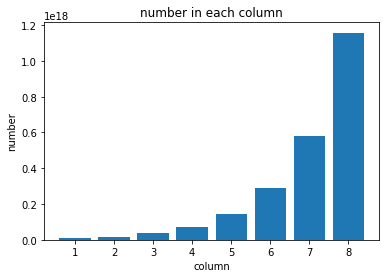

In [4]:
# 2
import matplotlib.pyplot as plt
%matplotlib inline

ave_for_each_column = np.mean(square_8, axis=0)

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), np.array(ave_for_each_column))
plt.show()

### 問題4 小麦の数のヒートマップ
___
*   8×8マスのチェス盤の小麦の数をヒートマップとして可視化する。



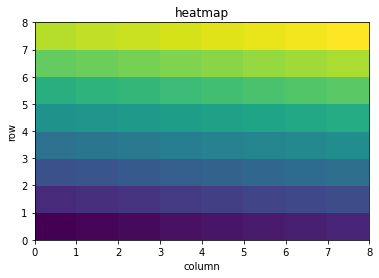

In [5]:
list_element = [0, 1]
for _ in range(8**2 -2):
  list_element.append(list_element[-1] + 2)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array(list_element).reshape(8, 8))
plt.show()

### 問題5　チェス盤の後半
___
チェス盤の後半(行数が8の場合は4〜7行目)にある小麦の数は前半（0〜3行目）にある小麦の数の何倍かを求める。



In [6]:
# 前半の小麦
first_harf = np.sum(square_8[:4])

# 後半の小麦
second_harf = np.sum(square_8[4:])

# 何倍になるか
print('後半の小麦の数は前半の{:,}倍である。'.format(second_harf / first_harf))

後半の小麦の数は前半の4,294,967,296.0倍である。


### 問題6　他の計算方法によるn×mマスへの拡張
___
問題2の関数を
1.   np.append()を使って実装
2.   ブロードキャストを利用して実装
<br>※ndarrayのデフォルトの型がint64である。
int64で表現できる値は　-2の64乗から2の64乗-1まで、つまり64マス目に乗っている小麦の数（$2 × 2^{64}$）は範囲外のため計算がおかしくなる。<br>今回は正の値しか利用しないため、 astype()でuint64を指定し、型を変える。




In [18]:
# 1
def board_list(n, m):
  n_squares = n*m  # マス目の数
  board_list = np.array([1]).astype(np.uint64)    # 型をuint64に変更
  for _ in range(n_squares - 1):   
    board_list = np.append(board_list, board_list[-1]*2)  # np.append(配列, 追加する要素)
  array_board_list = np.array(board_list).reshape(n, m)   # 行数n,列数m
  return array_board_list 

print(board_list(8, 8)[-1][-1])

9.223372036854776e+18


In [19]:
# 2
def board_list(n, m):
  n_squares = n*m
  # 要素数がマス目分の配列をreshapeし、型をuint64に変更
  indices_of_squares = np.arange(n_squares).reshape(n, m).astype(np.uint64)
  return 2**indices_of_squares    # 各要素を2の乗数として計算した行列を返す（2がブロードキャストされる）

print(board_list(8, 8)[-1][-1])

9223372036854775808


### 問題7　計算時間の比較
___
3種類の処理方法の実行時間を比較してみる。<br>マジックコマンドを使い、セル内の実行時間の平均を算出する。

In [15]:
# 1 リストにappendしていく処理
%%timeit
def board_list(n, m):
  n_squares = n*m  # マス目の数
  board_list = [1]    
  for _ in range(n_squares - 1):   
    board_list.append(board_list[-1]*2)
  array_board_list = np.array(board_list).reshape(n, m)   # 行数n,列数m
  return array_board_list 

board_list(3, 4)

The slowest run took 8.01 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.01 µs per loop


In [13]:
# 2 np.append()の処理
%%timeit
def board_list(n, m):
  n_squares = n*m  # マス目の数
  board_list = np.array([1]).astype(np.uint64)    # 型をuint64に変更
  for _ in range(n_squares - 1):   
    board_list = np.append(board_list, board_list[-1]*2)  # np.append(配列, 追加する要素)
  array_board_list = np.array(board_list).reshape(n, m)   # 行数n,列数m
  return array_board_list 

  board_list(3, 4)

10000000 loops, best of 3: 59.3 ns per loop


In [14]:
# 3 ブロードキャスト
%%timeit
def board_list(n, m):
  n_squares = n*m
  # 要素数がマス目分の配列をreshapeし、型をuint64に変更
  indices_of_squares = np.arange(n_squares).reshape(n, m).astype(np.uint64)
  return 2**indices_of_squares    # 各要素を2の乗数として計算した行列を返す（2がブロードキャストされる）

board_list(3, 4)

The slowest run took 65.89 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.18 µs per loop


np.append()での処理が一番早かった(60ns前後)。<br>
個人的にはブロードキャストの処理がfor文を通さないため一番早いと思っていたが、リストに追加する処理とあまり時間は変わらなかった(4μs前後)。

### 感想
___
リストの後ろを2倍していく処理方法よりも、$2^n$という配列にしてブロードキャスティングしていく処理方法の方がかっこいいと感じた。似たような処理が出てきたら積極的にブロードキャスティングで実装しようと思った。
